In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder # Scaling categorical
from sklearn.preprocessing import StandardScaler #Scaling
from sklearn.cluster import KMeans

In [8]:
df =pd.read_csv("Mall_Customers.csv")
df = df.iloc[:,3:]
sc = StandardScaler()
df = sc.fit_transform(df)
print(df)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

<h3>Elbow Method</h3>

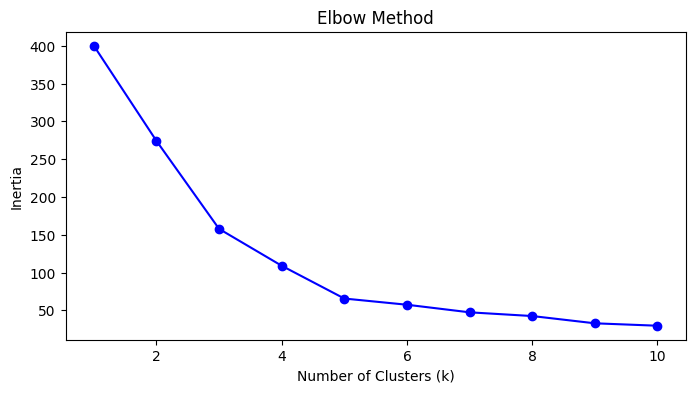

In [9]:
# List to store the inertia for each value of k
inertia = []

# Testing k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 0, init = 'k-means++')
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

<h3>K-Means</h3>

In [10]:
kmeans = KMeans(n_clusters = 5, random_state = 0, init = 'k-means++')
df_results = kmeans.fit_predict(df)

<h3>Visualising the clusters</h3>

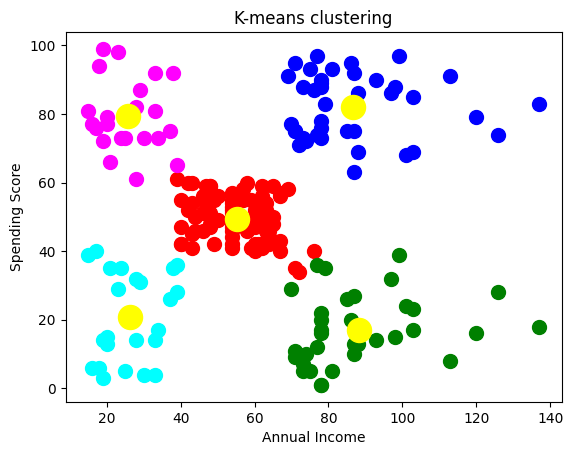

In [11]:
df = sc.inverse_transform(df)
centroids = sc.inverse_transform(kmeans.cluster_centers_)
plt.scatter(df[df_results == 0, 0],df[df_results == 0, 1], s = 100, c = 'red', label=f'Cluster 0')
plt.scatter(df[df_results == 1, 0],df[df_results == 1, 1], s = 100, c = 'blue', label=f'Cluster 1')
plt.scatter(df[df_results == 2, 0],df[df_results == 2, 1], s = 100, c = 'green', label=f'Cluster 2')
plt.scatter(df[df_results == 3, 0],df[df_results == 3, 1], s = 100, c = 'cyan', label=f'Cluster 3')
plt.scatter(df[df_results == 4, 0],df[df_results == 4, 1], s = 100, c = 'magenta', label=f'Cluster 4')
plt.scatter(centroids[:,0],centroids[:,1], s = 300, c = 'yellow', label=f'Centroids')
plt.title('K-means clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()